In [1]:
# Load the necessary libraries
import pandas as pd #using "pandas" package to clean up and manipulate data 
import numpy as np
import matplotlib.pyplot as plt #to plot a bar graph 
import seaborn as sns
import os

In [2]:
# Set working directory that contains the files
os.chdir("/Users/sugianto/Desktop/dataverse_files")
os.getcwd()

'/Users/sugianto/Desktop/dataverse_files'

In [3]:
#read data
data1 = pd.read_csv("2004.csv") #import data for year 2004
data2 = pd.read_csv("2005.csv") #import data for year 2005

airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
airplanes = pd.read_csv("plane-data.csv")


In [4]:
#Datas without cancelled and diverted flights.
data1 = data1[(data1.Cancelled == 0) & (data1.Diverted == 0)]
data2 = data2[(data2.Cancelled == 0) & (data2.Diverted == 0)]

In [5]:
#Look for Dataset sizes 
print(len(data1))
print(len(data2))

6987729
6992838


In [6]:
#see and compare data shape
print(data1.shape) #year 2004
print(data2.shape) #year 2005

(6987729, 29)
(6992838, 29)


In [7]:
#check for NA's in 2004 and 2005
print(data1.isna().sum())
print(data2.isna().sum())

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6987722
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64
Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
C

In [8]:
# perform full join on data1 and data2
data = pd.merge(data1, data2, how='outer')

In [9]:
#explore the data
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [10]:
#Create delay column
data['delay'] = ((data['DepDelay'])+(data['ArrDelay']))

In [11]:
# Look for missing values
data.isna().sum()

# Remove rows where Cancelled and Diverted columns are equal to 0 for DepDelay and ArrDelay columns
data = data[(data['Cancelled'] == 0) & (data['Diverted'] == 0) & (~data['DepDelay'].isna()) & (~data['ArrDelay'].isna())]

# 1a. When is the best day of the week to fly to minimise delays?

In [12]:
import calendar

# Convert Month column to month names
data['Month_name'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

# Convert DayOfWeek column to weekday names
data['DayOfWeek'] = data['DayOfWeek'].replace({
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
})

In [13]:
# Select columns and group by DayOfWeek, then calculate mean DepDelay and ArrDelay
mean_day = data[['DayOfWeek', 'DepDelay', 'ArrDelay']].groupby('DayOfWeek').mean().reset_index()
mean_day = mean_day.rename(columns={'DepDelay': 'Dep_del', 'ArrDelay': 'Arr_del'})

# Create new columns in DataFrame
mean_day['avg_delay_day'] = (mean_day['Dep_del'] + mean_day['Arr_del']) / 2
mean_day['total_avg_delay_day'] = mean_day['Dep_del'] + mean_day['Arr_del']

# Group by total_avg_delay_day and arrange by total_avg_delay_day
mean_day = mean_day.groupby('total_avg_delay_day').apply(lambda x: x.sort_values('total_avg_delay_day')).reset_index(drop=True)


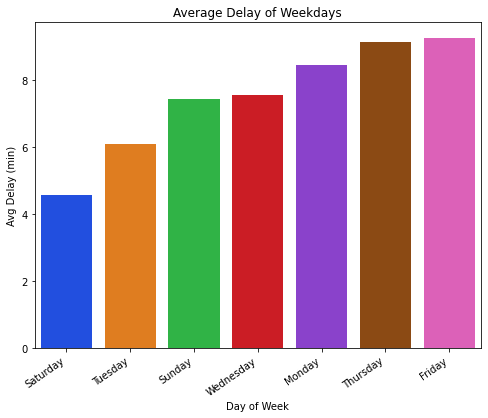

In [14]:
# Select DayOfWeek and avg_delay_day columns, group by DayOfWeek, and arrange by avg_delay_day
plot_mean_day = mean_day[['DayOfWeek', 'avg_delay_day']].groupby('DayOfWeek').mean().reset_index()
plot_mean_day = plot_mean_day.sort_values('avg_delay_day')

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='avg_delay_day', data=plot_mean_day, palette='bright')
plt.xlabel('Day of Week')
plt.ylabel('Avg Delay (min)')
plt.title('Average Delay of Weekdays')
plt.xticks(rotation=35, ha='right')
plt.show()

In [15]:
# Create table data for flights
total_day = data[['DayOfWeek', 'delay']].groupby('DayOfWeek').size().reset_index(name='Flights')
total_day = total_day.sort_values('Flights', ascending=False)

#Create columns in total_day data in Percentage
total_day['Flights_perc'] = total_day['Flights'] / len(data) * 100

# Create table data for delays
total_day2 = data[['DayOfWeek', 'DepDelay', 'ArrDelay']]
total_day2 = total_day2[(total_day2['DepDelay'] > 0) | (total_day2['ArrDelay'] > 0)]
total_day2 = total_day2.groupby('DayOfWeek').size().reset_index(name='Delays')
total_day2 = total_day2.sort_values('Delays', ascending=False)
total_day2['Delay_perc'] = total_day2['Delays'] / len(data) * 100
total_day2 = total_day2[['DayOfWeek', 'Delay_perc', 'Delays']]

#Join the Data
day_data = total_day.merge(total_day2, on='DayOfWeek', how='left')
day_data['Delays_perc'] = day_data['Delays'] / day_data['Flights']
day_data

,DayOfWeek,Flights,Flights_perc,Delay_perc,Delays,Delays_perc
0,Friday,2072701,14.825586,8.179010,1143472,0.551682
1,Thursday,2064554,14.767312,7.961973,1113129,0.539162
2,Monday,2048953,14.655722,7.556611,1056457,0.515608
3,Wednesday,2034281,14.550776,7.248275,1013350,0.498137
4,Tuesday,2028319,14.508131,6.935785,969662,0.478062
5,Sunday,1943817,13.903706,7.062346,987356,0.507947
6,Saturday,1787942,12.788766,5.894289,824055,0.460896


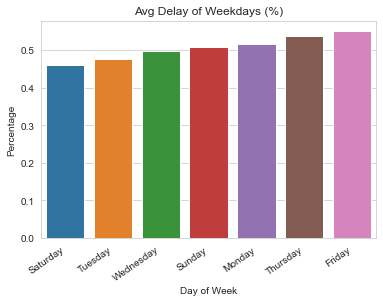

In [16]:
#Plot the graph
day_data_plot = day_data[['DayOfWeek', 'Delays_perc']].groupby('DayOfWeek').mean().reset_index()
day_data_plot = day_data_plot.sort_values(by='Delays_perc')

sns.set_style('whitegrid')
sns.barplot(x='DayOfWeek', y='Delays_perc', data=day_data_plot)
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Avg Delay of Weekdays (%)')
plt.xticks(rotation=35, ha='right')
plt.show()

# 1b. When is the best time of day to fly to minimise delays?

In [17]:
# Create time of day bin categories
categories=['night', 'before noon', 'afternoon', 'evening']
data['arr_time_bin'] = pd.cut(data['ArrTime'], bins=range(0, 2500, 600), labels=categories)
data['dep_time_bin'] = pd.cut(data['DepTime'], bins=range(0, 2500, 600), labels=categories)

# Create time of Day data
day_time = data[['DepDelay', 'dep_time_bin', 'ArrDelay', 'arr_time_bin']]
print(day_time)

# Drop the missing values we found above.
day_time = day_time.dropna()

# Create total data's
total_arr = day_time.groupby('arr_time_bin')['DepDelay'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(total_arr)

total_dep = day_time.groupby('dep_time_bin')['DepDelay'].count().reset_index(name='count').sort_values(by='count', ascending=False)
print(total_dep)

          DepDelay dep_time_bin  ArrDelay arr_time_bin
0             -7.0  before noon     -14.0  before noon
1             -9.0  before noon      -4.0  before noon
2              3.0  before noon       5.0  before noon
3             -3.0  before noon     -16.0  before noon
4              5.0  before noon       3.0  before noon
...            ...          ...       ...          ...
13980562      -3.0    afternoon     -22.0      evening
13980563       0.0      evening      10.0      evening
13980564      -4.0    afternoon      -8.0    afternoon
13980565      -1.0  before noon     -15.0  before noon
13980566       1.0    afternoon       7.0    afternoon

[13980567 rows x 4 columns]
  arr_time_bin    count
2    afternoon  5259969
3      evening  4568401
1  before noon  3824823
0        night   315128
  dep_time_bin    count
1  before noon  5307239
2    afternoon  5260805
3      evening  3077354
0        night   322923


In [18]:
# Create Data's for mean
mean_time_arr = day_time.groupby('arr_time_bin').agg({'ArrDelay': 'mean'}).reset_index()
print(mean_time_arr)

mean_time_dep = day_time.groupby('dep_time_bin').agg({'DepDelay': 'mean'}).reset_index()
print(mean_time_dep)

  arr_time_bin   ArrDelay
0        night  45.759253
1  before noon  -0.916200
2    afternoon   4.303569
3      evening  13.436362
  dep_time_bin   DepDelay
0        night   8.306603
1  before noon   2.222681
2    afternoon   8.175516
3      evening  18.562304


In [19]:
# Time of day column with arr_time_bin & dep_time_bin as variables
mean_time_arr = mean_time_arr.rename(columns={'arr_time_bin': 'time_of_day', 'ArrDelay': 'arr_mean'})
mean_time_dep = mean_time_dep.rename(columns={'dep_time_bin': 'time_of_day', 'DepDelay': 'dep_mean'})

data_arr = pd.DataFrame(mean_time_arr)
data_arr = data_arr.set_index('time_of_day')

data_dep = pd.DataFrame(mean_time_dep)
data_dep = data_dep.set_index('time_of_day')

# Mean
mean_time_dep = data_arr.join(data_dep, how='outer')
mean_time_dep['avg_delay_day'] = mean_time_dep['arr_mean'] + mean_time_dep['dep_mean']
mean_time_dep['total_delay_day'] = mean_time_dep['avg_delay_day']

# Group arrange
mean_time_day = mean_time_dep.reset_index().sort_values(by=['avg_delay_day'])
print(mean_time_day)

   time_of_day   arr_mean   dep_mean  avg_delay_day  total_delay_day
1  before noon  -0.916200   2.222681       1.306481         1.306481
2    afternoon   4.303569   8.175516      12.479085        12.479085
3      evening  13.436362  18.562304      31.998665        31.998665
0        night  45.759253   8.306603      54.065856        54.065856


In [20]:
#Create total data's
total_arr = day_time.groupby('arr_time_bin').size().reset_index(name='Flights').sort_values('Flights', ascending=False)
total_dep = day_time.groupby('dep_time_bin').size().reset_index(name='Flights').sort_values('Flights', ascending=False)

# Join
tot_time_day = pd.merge(total_dep, total_arr, left_on='dep_time_bin', right_on='arr_time_bin', how='outer')
tot_time_day['TimeofDay'] = tot_time_day['dep_time_bin'].fillna(tot_time_day['arr_time_bin'])
tot_time_day.drop(['dep_time_bin', 'arr_time_bin'], axis=1, inplace=True)
tot_time_day['Flights'] = tot_time_day['Flights_x'].fillna(0) + tot_time_day['Flights_y'].fillna(0)
tot_time_day.drop(['Flights_x', 'Flights_y'], axis=1, inplace=True)

# Data Dep Delays columns
dep2_time_day = day_time[day_time['DepDelay'] > 0]
dep2_time_day = dep2_time_day.groupby('dep_time_bin').size().reset_index(name='Delays').sort_values('Delays', ascending=False)

# Data Arr delays columns
arr2_time_day = day_time[day_time['ArrDelay'] > 0]
arr2_time_day = arr2_time_day.groupby('arr_time_bin').size().reset_index(name='Delays').sort_values('Delays', ascending=False)

# Join
tot2_time_day = pd.merge(dep2_time_day, arr2_time_day, left_on='dep_time_bin', right_on='arr_time_bin', how='outer')
tot2_time_day['TimeofDay'] = tot2_time_day['dep_time_bin'].fillna(tot2_time_day['arr_time_bin'])
tot2_time_day.drop(['dep_time_bin', 'arr_time_bin'], axis=1, inplace=True)
tot2_time_day['Delays'] = tot2_time_day['Delays_x'].fillna(0) + tot2_time_day['Delays_y'].fillna(0)
tot2_time_day.drop(['Delays_x', 'Delays_y'], axis=1, inplace=True)

# Final join and show table
tot3_time_day = pd.merge(tot_time_day, tot2_time_day, left_on='TimeofDay', right_on='TimeofDay', how='outer')
tot3_time_day['Delays_perc'] = tot3_time_day['Delays'] / tot3_time_day['Flights']
tot3_time_day = tot3_time_day[['TimeofDay', 'Flights', 'Delays', 'Delays_perc']]


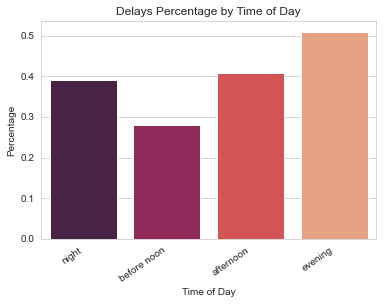

In [21]:
# select columns and arrange by Delays_perc
plot_tot3_time_day = tot3_time_day[['TimeofDay', 'Delays_perc']].sort_values('Delays_perc')

# plot the graph
sns.barplot(x='TimeofDay', y='Delays_perc', data=plot_tot3_time_day, palette='rocket')
plt.title('Delays Percentage by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Percentage')
plt.xticks(rotation=35, ha='right')
plt.show()

# 1c. When is the best time of year to fly to minimise delays?

In [22]:
# Mean
# Create Data with columns of interest
mean_month = data[['Month', 'DepDelay', 'ArrDelay']]
mean_month = mean_month.groupby('Month').agg(Dep_del=('DepDelay', 'mean'), Arr_del=('ArrDelay', 'mean')).reset_index()

# Average columns
mean_month['avg_delay_day'] = (mean_month['Dep_del'] + mean_month['Arr_del']) / 2  # avg. column
mean_month['tot_avg_delay_day'] = mean_month['Dep_del'] + mean_month['Arr_del']  # tot column

# Group and Arrange
mean_month = mean_month.groupby('avg_delay_day').apply(lambda x: x.sort_values('avg_delay_day')).reset_index(drop=True)

In [23]:
# Create Data for flight total
tot_month = data[['Month_name', 'delay']]
tot_month = tot_month.groupby('Month_name').size().reset_index(name='Flights').sort_values(by='Flights', ascending=False)

tot_month['Flights_perc'] = (tot_month['Flights'] / 13980567) * 100

# Create data for delays
tot2_month = data[['Month_name', 'DepDelay', 'ArrDelay']]
tot2_month = tot2_month[(tot2_month['DepDelay'] > 0) | (tot2_month['ArrDelay'] > 0)]
tot2_month = tot2_month.groupby('Month_name').size().reset_index(name='Delays').sort_values(by='Delays', ascending=False)

# Join
tot3_month = tot_month.merge(tot2_month, on='Month_name', how='left')
tot3_month['Delays_perc'] = tot3_month['Delays'] / tot3_month['Flights']
tot3_month = tot3_month.sort_values('Delays_perc').reset_index(drop=True)


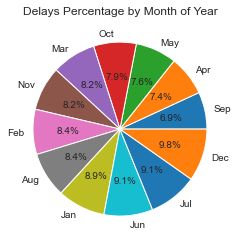

In [24]:
# group and arrange data
plot_tot3_time_month = tot3_month.sort_values(by=['Delays_perc'])

# create pie chart
fig, ax = plt.subplots()
ax.pie(plot_tot3_time_month['Delays_perc'], labels=plot_tot3_time_month['Month_name'], autopct='%1.1f%%')
ax.set_title('Delays Percentage by Month of Year')

plt.show()